In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

/Users/ajwright/anaconda3/envs/my_conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# set plot style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
# import data
full_train = pd.read_csv("../data/progresspics_2018_training_data.cvs")

In [4]:
full_train.head()

,sex,age,height,start_weight,end_weight,score,num_comments,num_posts,num_posts_cat,post_order,...,gym,lifting,working,diet,muscle,nsfw,weight_diff,gain_or_lose,fill_period_weeks,change_rate
0,1.0,34.0,68.0,189.0000,175.00000,1338,42,3,"(2.0, 4.0]",3.0,...,0,0,0,0,0,0,14.00000,0,312.000000,0.044872
1,1.0,35.0,76.0,316.0000,268.00000,1,1,0,"(-inf, 0.0]",0.0,...,0,1,0,0,0,0,48.00000,0,16.000000,3.000000
2,1.0,33.0,74.0,260.0000,220.00000,1,0,8,"(4.0, 8.0]",3.0,...,0,0,0,0,0,0,40.00000,0,10.000000,4.000000
3,1.0,27.0,74.0,235.0000,170.00000,44,2,3,"(2.0, 4.0]",3.0,...,0,0,0,0,0,0,65.00000,0,59.888934,1.085342
4,1.0,17.0,73.0,165.3465,211.64352,1,1,1,"(0.0, 1.0]",1.0,...,0,0,0,0,0,0,-46.29702,1,156.000000,-0.296776


## Visualization and summary of each feature and feature/target combination

In [5]:
# helper functions for num_target_feature_analysis
    
def numtarget_catfeature(df, target, feature):
    """Prints a bar chart comparing the number of instances in each category for the specificed categorical 
    feature, prints a distribution plot for the numerical target seperated into feature categories, and prints 
    a box and whisker plot for the numerical target seprerated by feature categories. For the categorical
    feature, prints infomation about the number of instances, how many are Nans, what the categories are and the
    percentage of instances in each category. 
    
    Written for Jupyter notebooks that start with %matplotlib inline.
    
    Helper function for num_target_feature_analysis
    
    Arguments: 
    df -- pandas dataframe containing a numerical target column and categorical feature columns
    target -- string containing the name of a numerical target column
    feature -- string containing the name of the categorical feature column
    """
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
    ax1, ax2, ax3 = axes.flatten()
    df[feature].value_counts().plot(kind='bar', ax=ax1)
    cats = df[feature].unique()
    for cat in cats:
        sns.distplot(df[df[feature] == cat][target].dropna(), ax=ax2)
    sns.boxplot(x=feature, y=target, data=df, ax=ax3)
    fig.suptitle(f'Categorical Feature:  "{feature}"  Numerical Target:  "{target}"', fontsize=14, fontweight="bold")
    display(fig)
    plt.close()
    total = df.shape[0]
    nans = df[feature].isnull().sum()
    print(f'The feature, "{feature}", has {total} entries and {nans} are NaNs ({nans/total}%).')
    print(f'It is categorical and is {df[feature].dtype} dtype.')
    print("This categorical feature consists of the following categories:")
    print(df[feature].value_counts(normalize=True))
    
    
def numtarget_numfeature(df, target, feature):
    """Prints a box and whisker plot for the numerical feature, a scatterplot of the numerical feature (x-axis)
    and numerical target (y-axis) with a regression line, and a hexbin plot of the numerical feature (x-axis)
    and numerical target (y-axis).  Prints summary stats for the numerical feature include the dtype,
    number of NaNs, mean, median, etc. 
    
    Written for Jupyter notebooks that start with %matplotlib inline.
    
    Helper function for num_target_feature_analysis
    
    Arguments:
    df -- pandas dataframe containing a numerical target column and numerical feature columns
    target -- string containing the name of the numerical target column
    feature -- string containing the name of the numerical feature column
    """
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
    ax1, ax2, ax3 = axes.flatten()
    sns.boxplot(y=df[feature], ax=ax1)
    sns.regplot(df[feature], df[target], ax=ax2, line_kws={"color": "black"})
    ax2.set(xlabel=f"{feature}", ylabel=f"{target}")
    ax3.hexbin(df[feature], df[target], cmap='Reds')
    ax3.set(xlabel=f"{feature}", ylabel=f"{target}")
    fig.suptitle(f'Numerical Feature:  "{feature}"  Numerical Target:  "{target}"', fontsize=14, fontweight="bold") 
    display(fig)
    plt.close()
    total = df.shape[0]
    nans = df[feature].isnull().sum()
    print(f'The feature, "{feature}", has {total} entries and {nans} are NaNs ({nans/total}%).')
    print(f'It is numerical and is {df[feature].dtype} dtype.')
    print(df[feature].describe())
    
def correlation_coeffs(df, target):
    """Prints correlation coefficients for the numerical target and all numerical features. 
    
    Helper function for num_target_feature_analysis
    
    Arguments:
    df -- pandas dataframe containing a numerical target column and numerical feature columns
    target -- string containing the name of the numerical target column
    
    """
    corr_matrix = df.corr()
    print(corr_matrix[target].sort_values(ascending=False))    

In [6]:
def num_target_feature_analysis(df, target, cat_features, num_features):
    """Performs feature exploration of a dataset containing a numerical target and numerical and/or categorical
    features.  First prints the summary stats of the numerical target including how many instances, how many NaNs, 
    median, mean etc.  Then it pairs the target with each feature and prints 3 plots exploring the target feature
    and comparing it the feature as well as printing summary stats for each feature.  Finally, for numerical 
    features, it prints the correlation coefficent between the numerical target and each numerical feature. 
    
    Written for Jupyter notebooks that start with %matplotlib inline.
    
    Arguments: 
    df -- pandas dataframe containing a numerical target column and numerical and/or categorical feature columns
    target -- string contining the name of the numerical target column
    cat_features -- list of categorical features
    num_features -- list of numerical features 
    """
    total = df.shape[0]
    nans = df[target].isnull().sum()
    print()
    print(f'The target, "{target}", has {total} entries and {nans} are NaNs ({nans/total}%).')
    print(f'It is numerical and is {df[target].dtype} dtype.')
    print(df[target].describe())
    print()
    fig, ax = plt.subplots()
    sns.boxplot(y=df[target], ax=ax)
    display(fig)
    plt.close()
    print()
    for cat_feature in cat_features:
        numtarget_catfeature(df, target, cat_feature)
        print()
    for num_feature in num_features:
        numtarget_numfeature(df, target, num_feature)    
        print()
    print()
    print(f'Correlation coeffiecents between all numerical features and the target, "{target}":  ')
    correlation_coeffs(df, target)

In [7]:
full_train.columns

Index(['sex', 'age', 'height', 'start_weight', 'end_weight', 'score',
       'num_comments', 'num_posts', 'num_posts_cat', 'post_order', 'month',
       'dayofweek', 'progress', 'face', 'goal', 'finally', 'cico', 'keto',
       'gains', 'gym', 'lifting', 'working', 'diet', 'muscle', 'nsfw',
       'weight_diff', 'gain_or_lose', 'fill_period_weeks', 'change_rate'],
      dtype='object')


The target, "end_weight", has 17187 entries and 0 are NaNs (0.0%).
It is numerical and is float64 dtype.
count    17187.000000
mean       179.180989
std         45.167901
min         92.000000
25%        149.000000
50%        172.000000
75%        200.000000
max        573.201200
Name: end_weight, dtype: float64



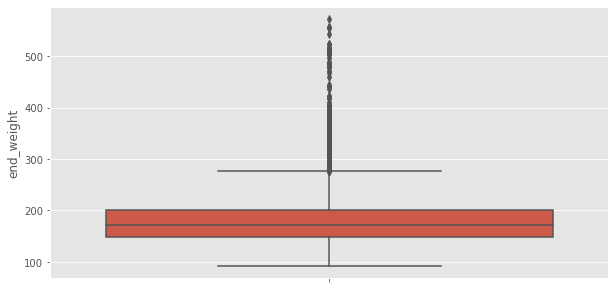

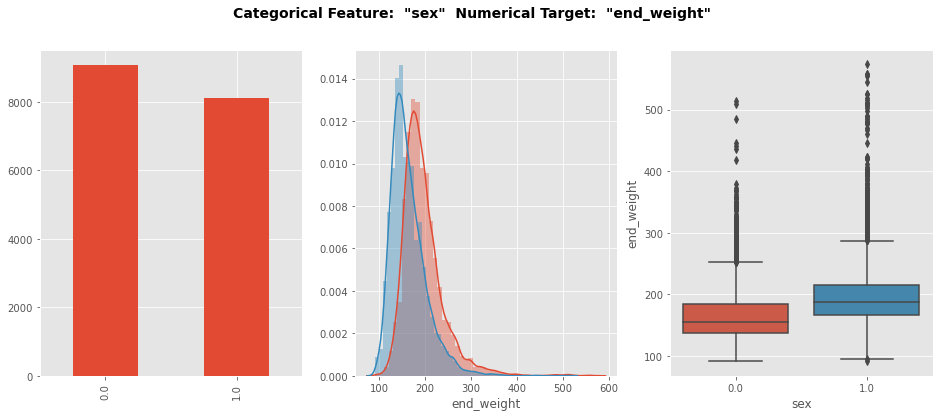

The feature, "sex", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is float64 dtype.
This categorical feature consists of the following categories:
0.0    0.527841
1.0    0.472159
Name: sex, dtype: float64



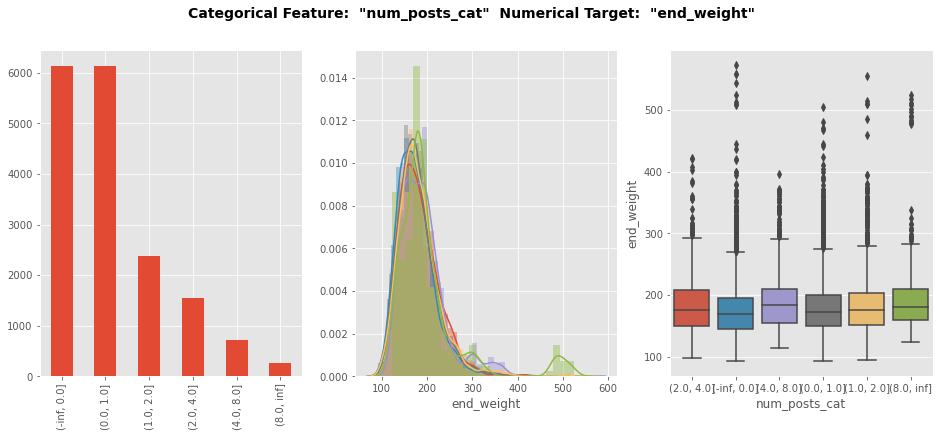

The feature, "num_posts_cat", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is object dtype.
This categorical feature consists of the following categories:
(-inf, 0.0]    0.357247
(0.0, 1.0]     0.356490
(1.0, 2.0]     0.138302
(2.0, 4.0]     0.090417
(4.0, 8.0]     0.042299
(8.0, inf]     0.015244
Name: num_posts_cat, dtype: float64



/Users/ajwright/anaconda3/envs/my_conda/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/ajwright/anaconda3/envs/my_conda/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ajwright/anaconda3/envs/my_conda/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/ajwright/anaconda3/envs/my_conda/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ajwright/anaconda3/envs/my_conda/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/ajwright/anaconda3/envs/my_conda/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: i

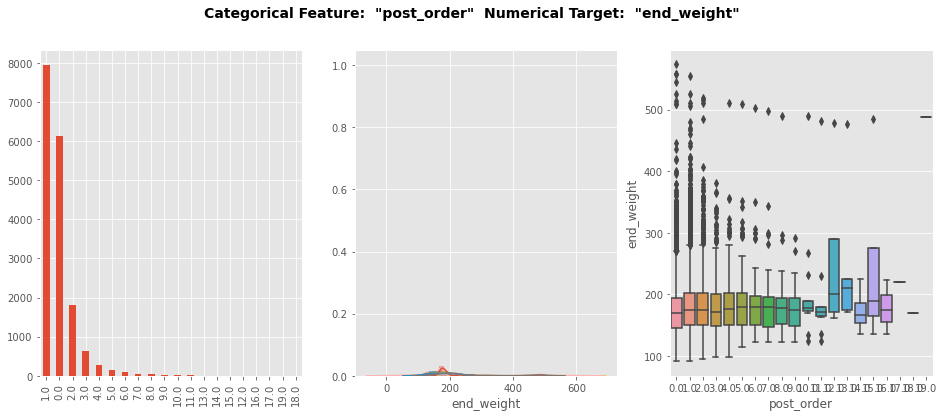

The feature, "post_order", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is float64 dtype.
This categorical feature consists of the following categories:
1.0     0.461977
0.0     0.357247
2.0     0.105254
3.0     0.036481
4.0     0.015651
5.0     0.009018
6.0     0.005178
7.0     0.002909
8.0     0.002036
9.0     0.001455
10.0    0.000873
11.0    0.000582
13.0    0.000291
14.0    0.000233
15.0    0.000233
12.0    0.000233
16.0    0.000175
17.0    0.000058
19.0    0.000058
18.0    0.000058
Name: post_order, dtype: float64



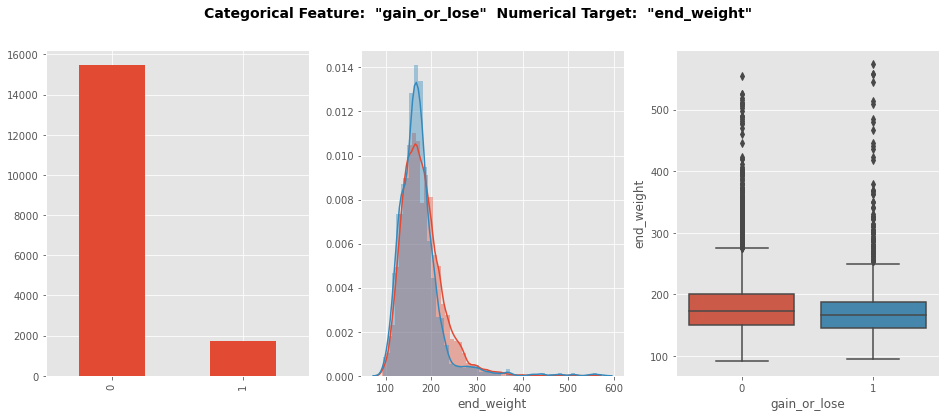

The feature, "gain_or_lose", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.899924
1    0.100076
Name: gain_or_lose, dtype: float64



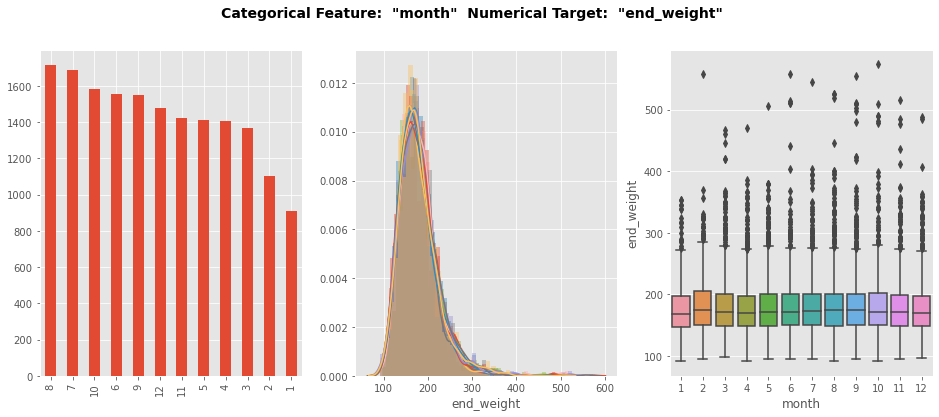

The feature, "month", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
8     0.099727
7     0.098330
10    0.091988
6     0.090475
9     0.090068
12    0.085995
11    0.082853
5     0.082213
4     0.081806
3     0.079595
2     0.064118
1     0.052831
Name: month, dtype: float64



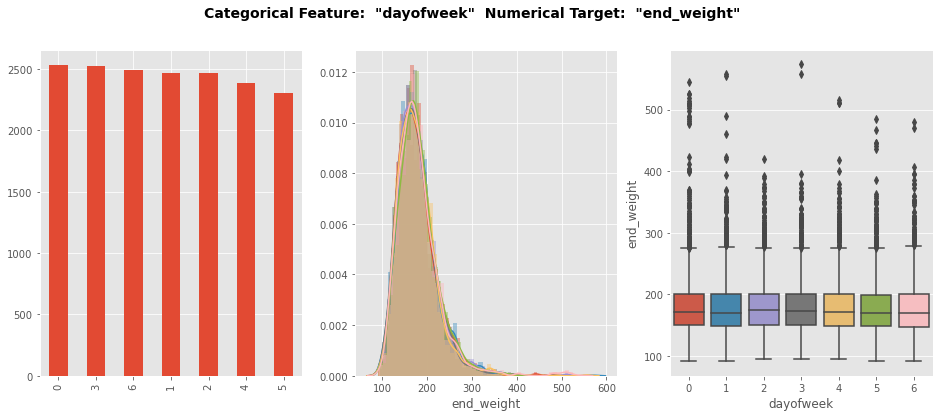

The feature, "dayofweek", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.147321
3    0.147088
6    0.145226
1    0.143830
2    0.143771
4    0.138768
5    0.133997
Name: dayofweek, dtype: float64



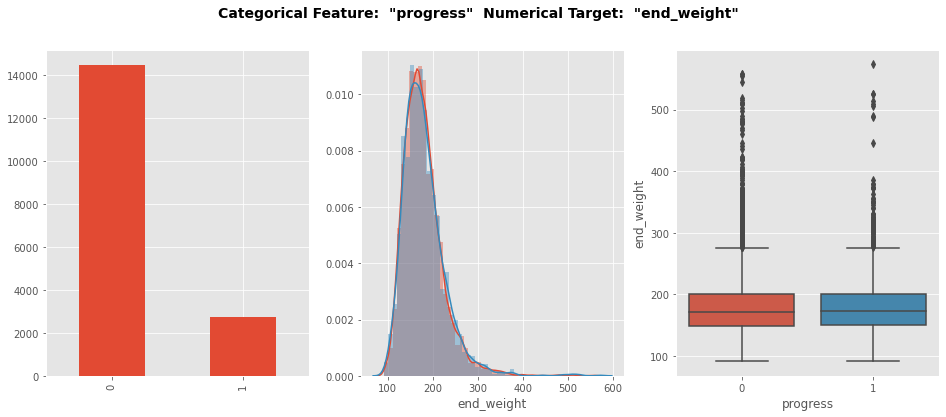

The feature, "progress", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.841683
1    0.158317
Name: progress, dtype: float64



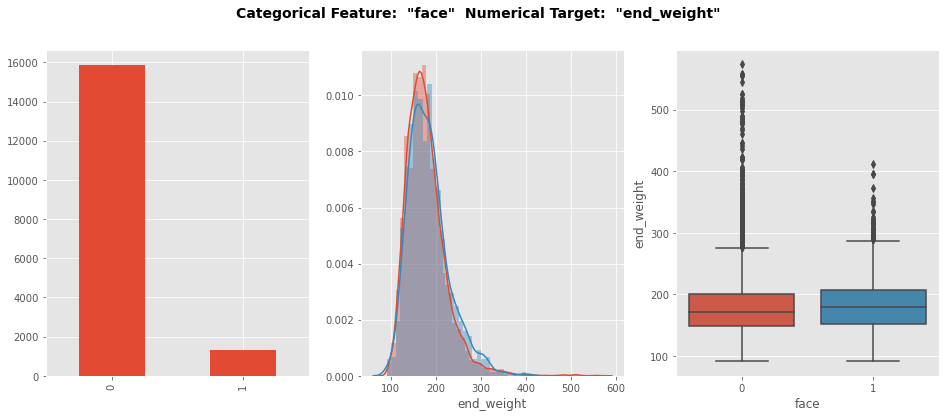

The feature, "face", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.9225
1    0.0775
Name: face, dtype: float64



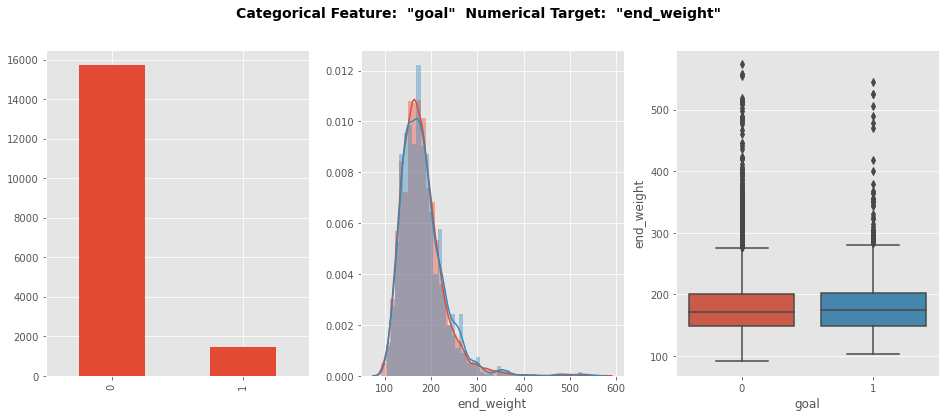

The feature, "goal", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.914412
1    0.085588
Name: goal, dtype: float64



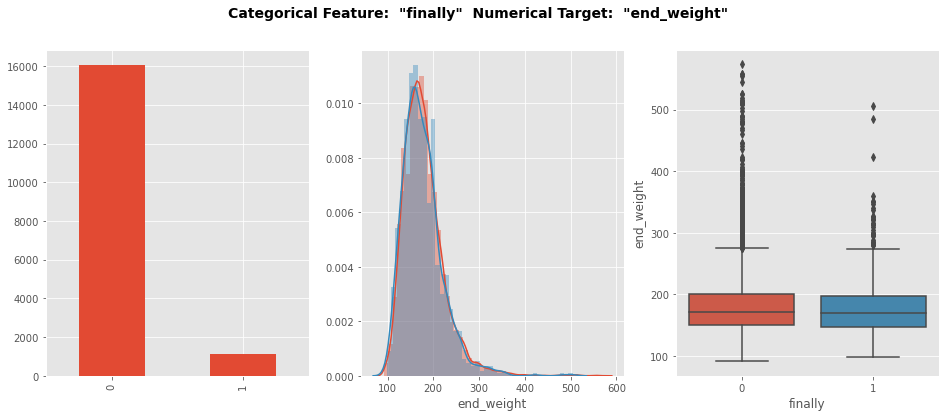

The feature, "finally", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.933671
1    0.066329
Name: finally, dtype: float64



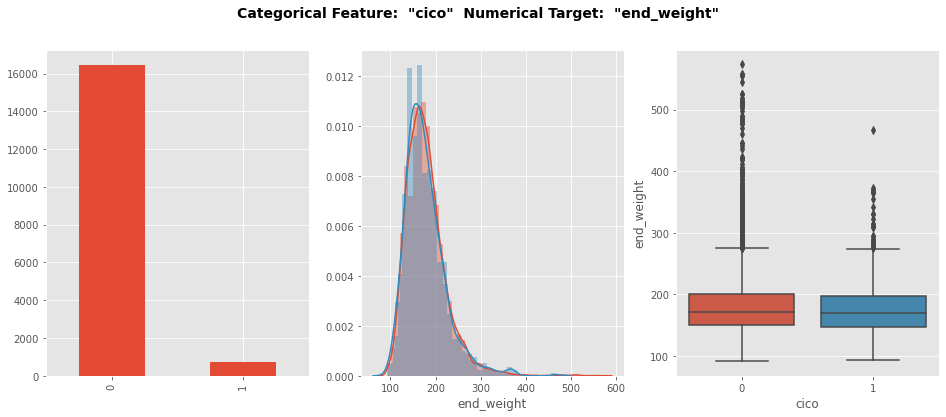

The feature, "cico", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.957002
1    0.042998
Name: cico, dtype: float64



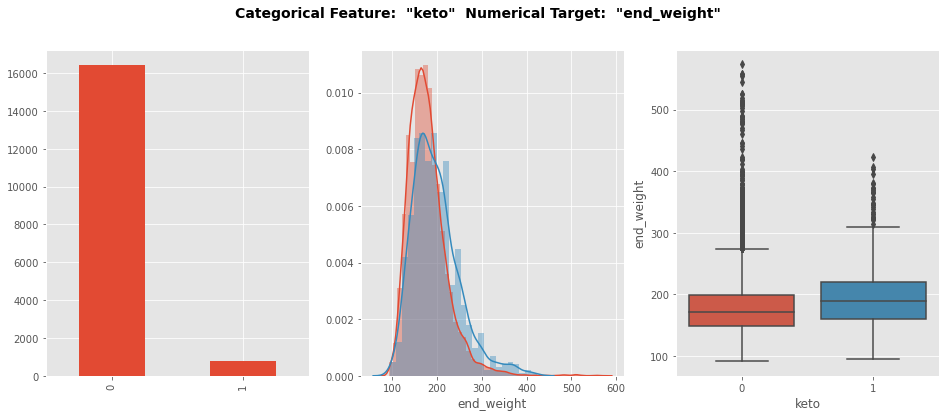

The feature, "keto", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.955606
1    0.044394
Name: keto, dtype: float64



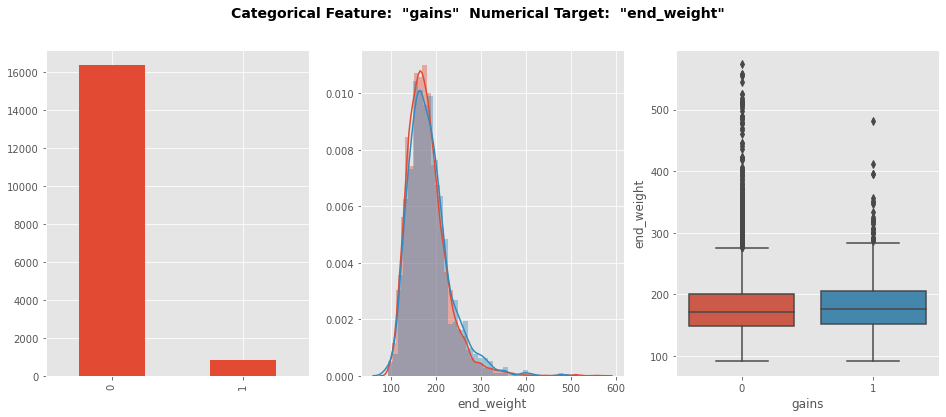

The feature, "gains", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.951417
1    0.048583
Name: gains, dtype: float64



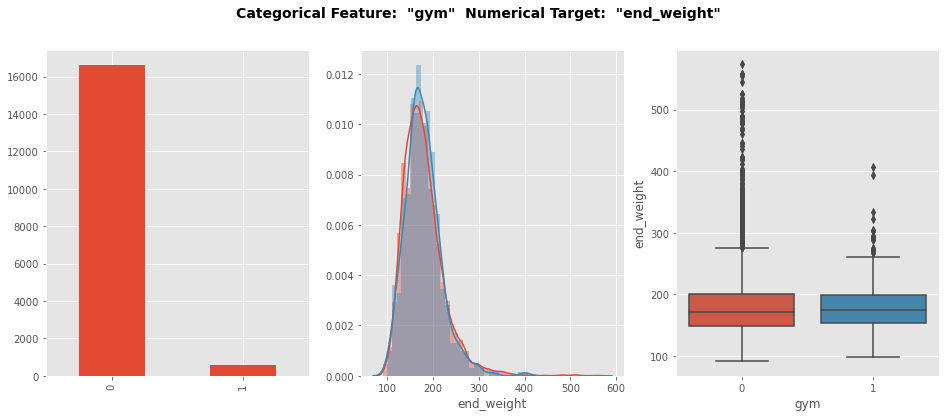

The feature, "gym", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.966719
1    0.033281
Name: gym, dtype: float64



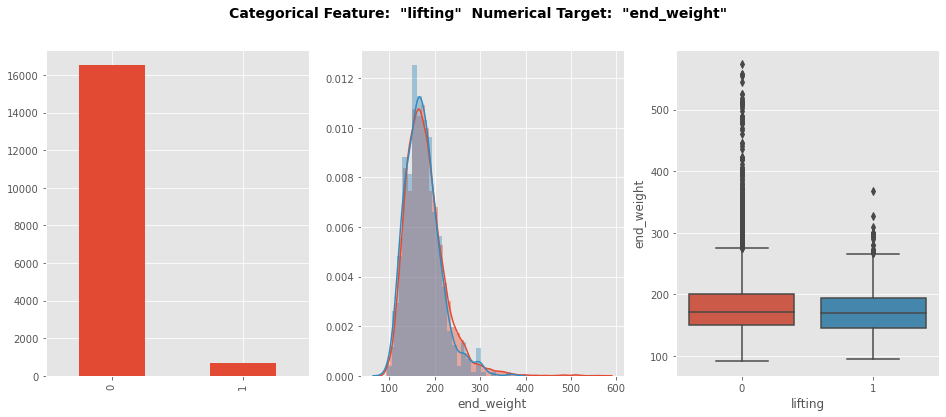

The feature, "lifting", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.961308
1    0.038692
Name: lifting, dtype: float64



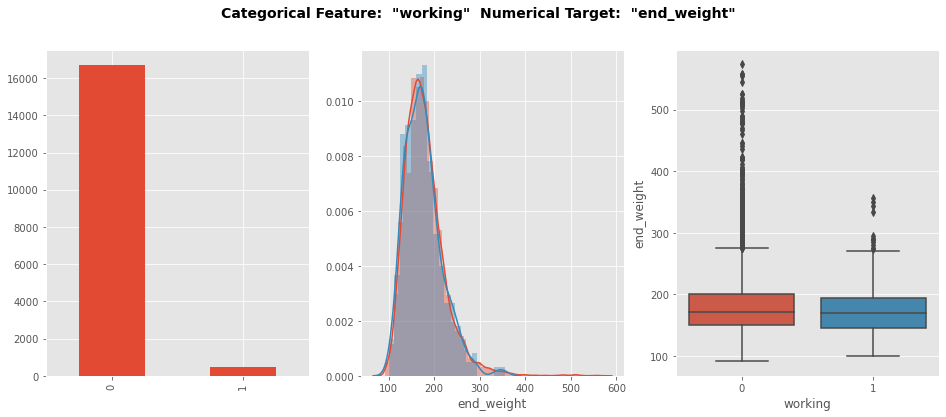

The feature, "working", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.971316
1    0.028684
Name: working, dtype: float64



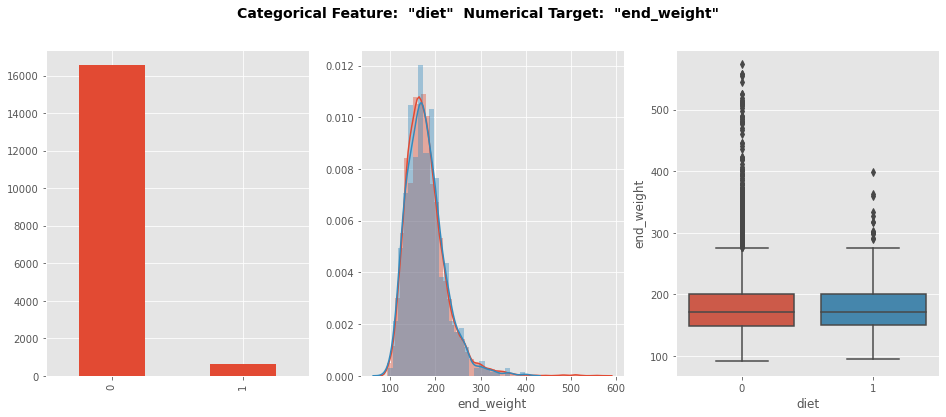

The feature, "diet", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.963461
1    0.036539
Name: diet, dtype: float64



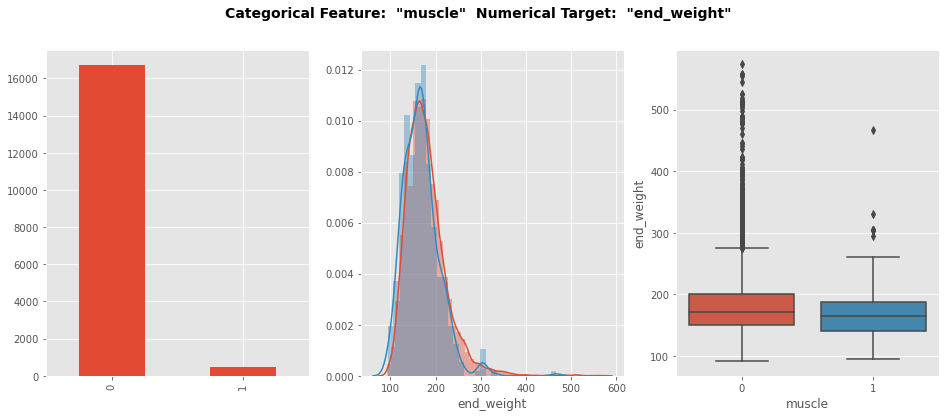

The feature, "muscle", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.972537
1    0.027463
Name: muscle, dtype: float64



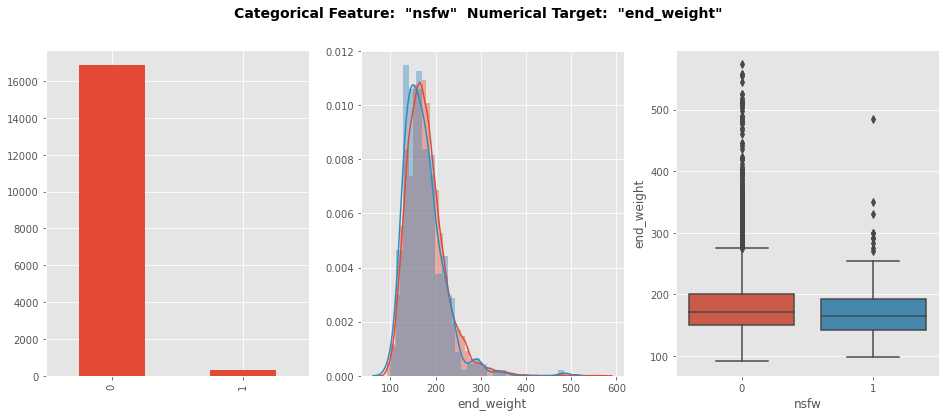

The feature, "nsfw", has 17187 entries and 0 are NaNs (0.0%).
It is categorical and is int64 dtype.
This categorical feature consists of the following categories:
0    0.981556
1    0.018444
Name: nsfw, dtype: float64



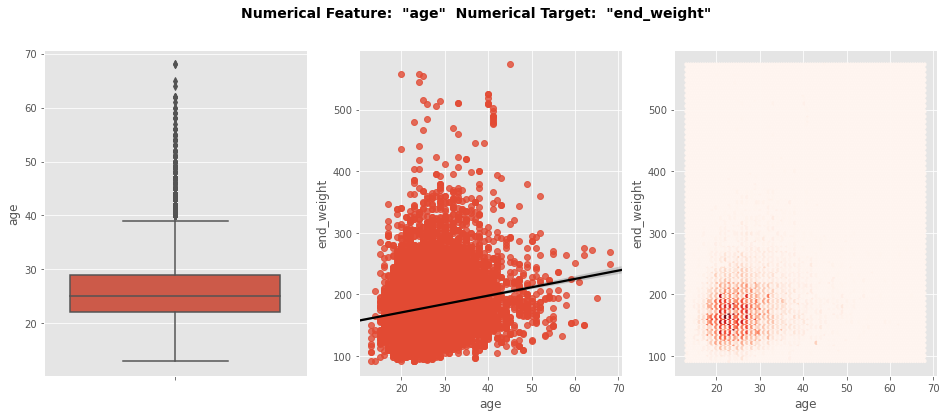

The feature, "age", has 17187 entries and 0 are NaNs (0.0%).
It is numerical and is float64 dtype.
count    17187.000000
mean        26.161808
std          6.072370
min         13.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         68.000000
Name: age, dtype: float64



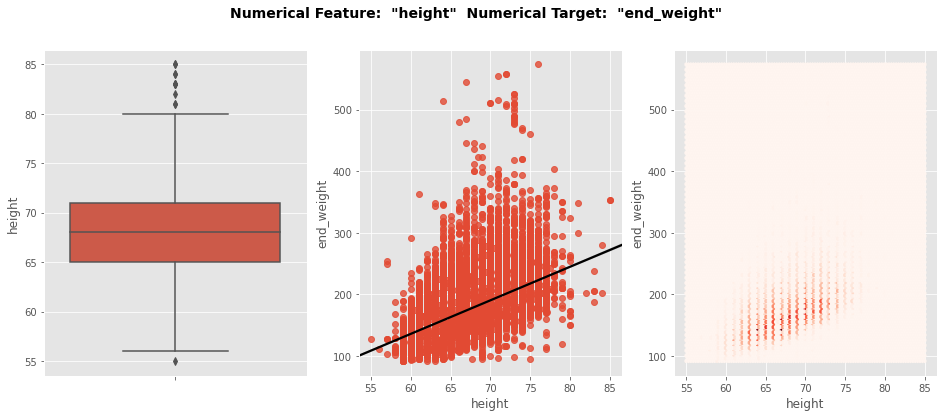

The feature, "height", has 17187 entries and 0 are NaNs (0.0%).
It is numerical and is float64 dtype.
count    17187.000000
mean        67.936349
std          4.040692
min         55.000000
25%         65.000000
50%         68.000000
75%         71.000000
max         85.000000
Name: height, dtype: float64



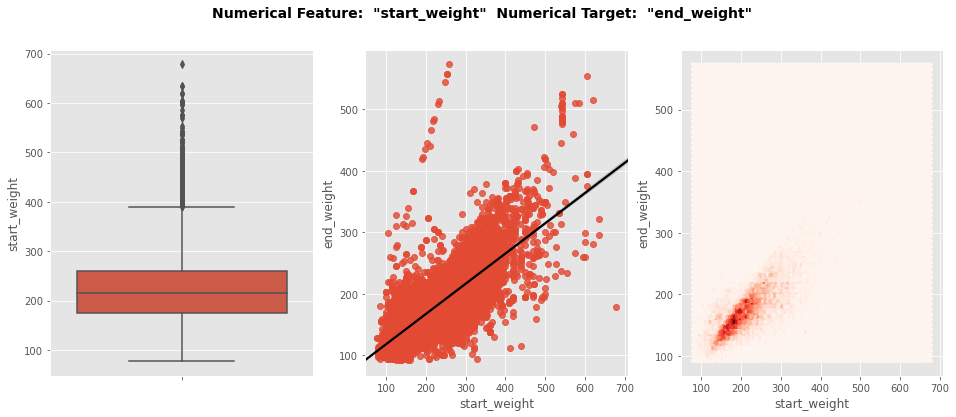

The feature, "start_weight", has 17187 entries and 0 are NaNs (0.0%).
It is numerical and is float64 dtype.
count    17187.000000
mean       223.739073
std         69.240431
min         78.000000
25%        175.000000
50%        215.000000
75%        261.000000
max        678.000000
Name: start_weight, dtype: float64



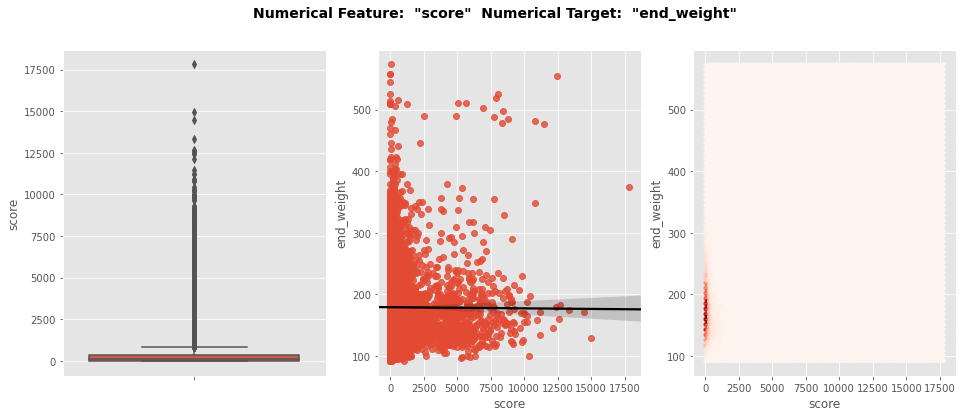

The feature, "score", has 17187 entries and 0 are NaNs (0.0%).
It is numerical and is int64 dtype.
count    17187.000000
mean       437.705999
std       1108.576594
min          0.000000
25%          8.000000
50%        127.000000
75%        344.000000
max      17805.000000
Name: score, dtype: float64



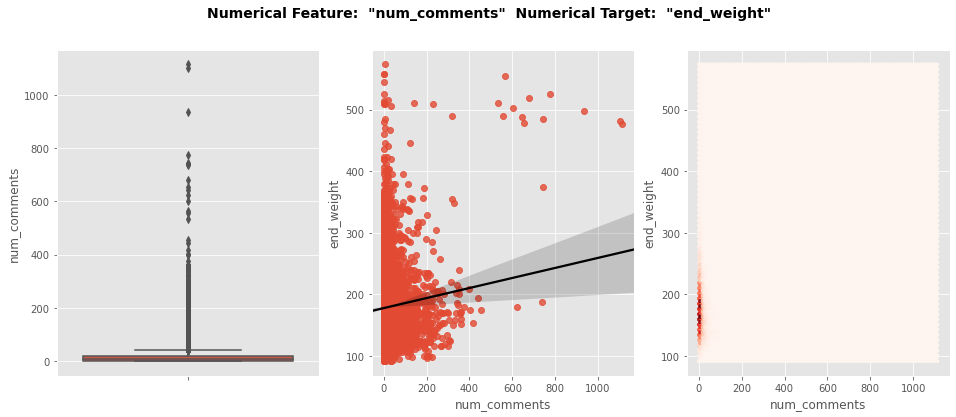

The feature, "num_comments", has 17187 entries and 0 are NaNs (0.0%).
It is numerical and is int64 dtype.
count    17187.000000
mean        16.826846
std         38.289435
min          0.000000
25%          1.000000
50%          7.000000
75%         17.000000
max       1114.000000
Name: num_comments, dtype: float64



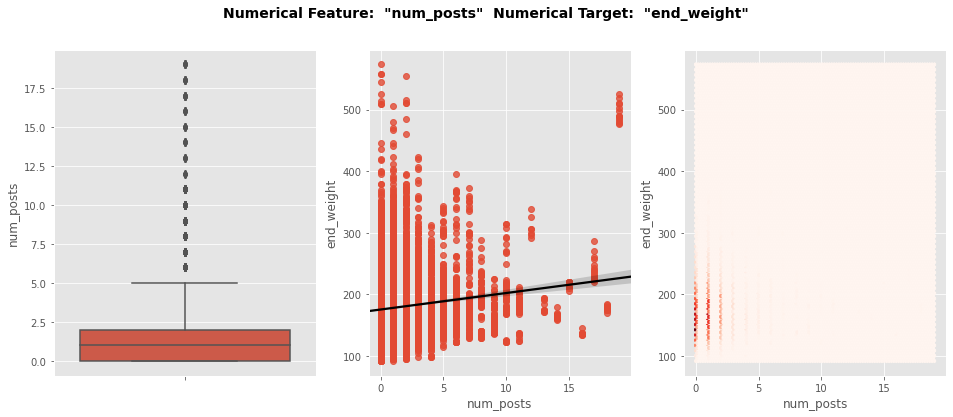

The feature, "num_posts", has 17187 entries and 0 are NaNs (0.0%).
It is numerical and is int64 dtype.
count    17187.000000
mean         1.369989
std          1.992220
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: num_posts, dtype: float64



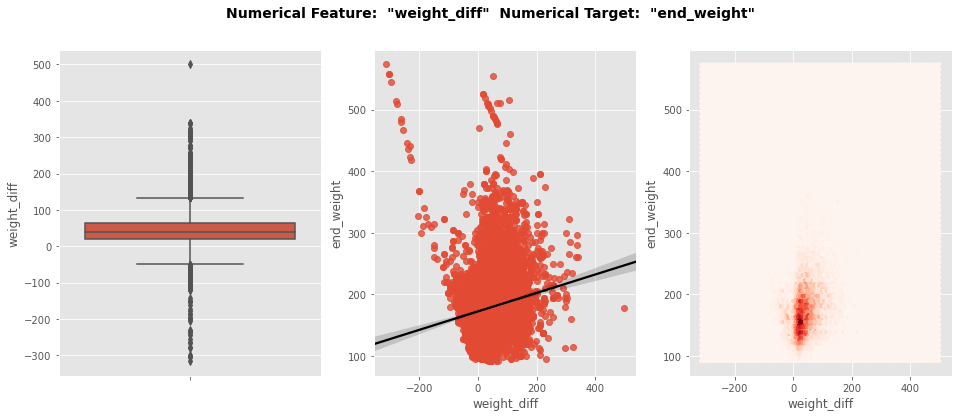

The feature, "weight_diff", has 17187 entries and 0 are NaNs (0.0%).
It is numerical and is float64 dtype.
count    17187.000000
mean        44.558084
std         46.045621
min       -315.260660
25%         19.000000
50%         38.000000
75%         65.000000
max        500.000000
Name: weight_diff, dtype: float64



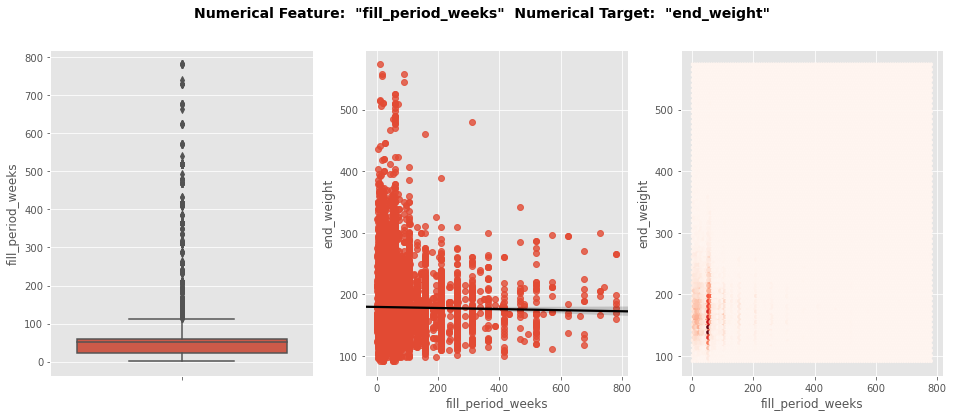

The feature, "fill_period_weeks", has 17187 entries and 0 are NaNs (0.0%).
It is numerical and is float64 dtype.
count    17187.000000
mean        59.381788
std         65.705872
min          2.000000
25%         24.000000
50%         52.000000
75%         59.888934
max        780.000000
Name: fill_period_weeks, dtype: float64



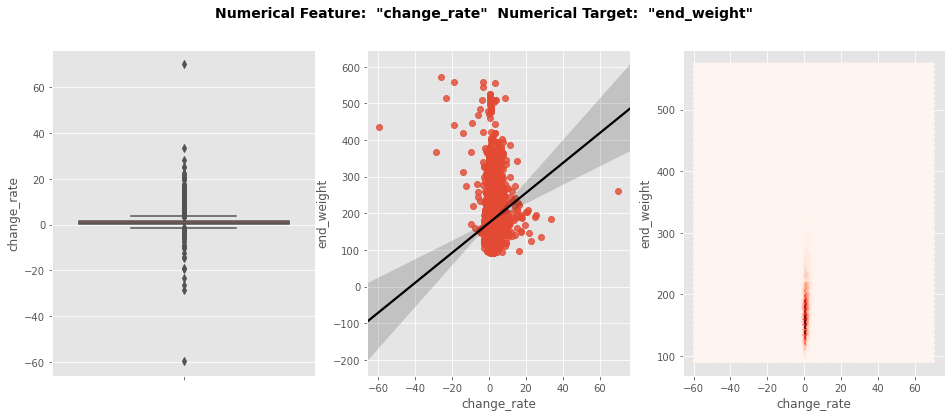

The feature, "change_rate", has 17187 entries and 0 are NaNs (0.0%).
It is numerical and is float64 dtype.
count    17187.000000
mean         1.236300
std          1.734949
min        -59.524740
25%          0.423965
50%          0.961538
75%          1.753245
max         70.000000
Name: change_rate, dtype: float64


Correlation coeffiecents between all numerical features and the target, "end_weight":  
end_weight           1.000000
start_weight         0.753679
height               0.486619
sex                  0.351476
age                  0.182624
change_rate          0.156703
weight_diff          0.152395
num_posts            0.118129
keto                 0.085137
num_comments         0.069087
post_order           0.068662
face                 0.035206
gains                0.022308
goal                 0.020807
progress             0.010627
month                0.003740
gym                 -0.000661
diet                -0.003397
score               -0.004565
cico                -0.

In [8]:
# feature exploration

pp_data_cat_features = ['sex', 'num_posts_cat', 'post_order', 'gain_or_lose', 'month', 'dayofweek', 'progress', 'face', 'goal', 
                        'finally', 'cico', 'keto', 'gains', 'gym', 'lifting', 'working', 'diet', 'muscle', 'nsfw']
pp_data_num_features = ['age', 'height', 'start_weight', 'score', 'num_comments', 'num_posts', 
                        'weight_diff', 'fill_period_weeks', 'change_rate']

num_target_feature_analysis(full_train, "end_weight", pp_data_cat_features, pp_data_num_features)